<!-- dom:TITLE: Assigment 2--> 
# Assignment 2
<!-- dom:AUTHOR: Pablo Díaz Viñambres -->
<!-- Author: -->  
**Pablo Díaz Viñambres**

Date: **Sep 11, 2022**

Problems 2 and 4 presented in a separate PDF file since they didn't need any coding.

In [1]:
%matplotlib inline

import numpy as np
from math import factorial
from numpy.linalg import solve, norm    # Solve linear systems and compute norms
import matplotlib.pyplot as plt
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

# Exercise 1
We consider the function $f(x) = 2^{-x^2+3x-2}$
### a) Interpolate $f(x)$ to a polynomial of minimal deegree, using the interpolation points given. Compute the maximal erorr in [-1, 2] and [-10, 10]

0.25 + 0.7031250000000002 x**1 + 0.25781250000000006 x**2 -
0.21093750000000014 x**3


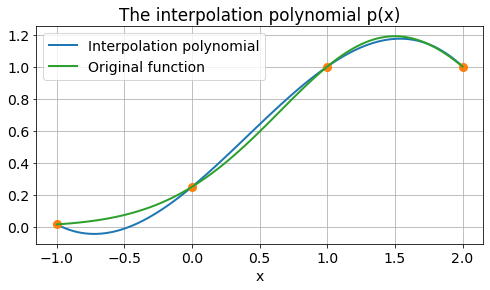

In [2]:
# Interpolation data
# We define a function that computes both the y-values for a collection of nodes and the interpolation polynomial
# Arguments:
# xdata: An array of interpolation points
# f: A function x --> f(x) to be applied at each x in xdata
def getInterpolationPoly(xdata, f):
    ydata = []
    for x in xdata:
        ydata.append(f(x))
    # Compute the interpolation polynomial using built in numpy functions
    p = np.polynomial.Polynomial.fit(xdata, ydata, np.size(xdata) - 1)
    return ydata, p

# Get the interpolation polynomial
xdata = [-1, 0, 1, 2]
f = lambda x: 2**(-x**2+3*x-2)
ydata, p = getInterpolationPoly(xdata, f)
# Plot the polynomial and the original function in [-1, 2]
a, b = -1, 2
print(p.convert())
x = np.linspace(a, b, 101)         # The 'x-axis'
plt.title('The interpolation polynomial p(x)')
plt.xlabel('x');
plt.plot(x, p(x), label = "Interpolation polynomial")                  # Plot the polynomial
plt.plot(xdata, ydata, 'o')                                            # Plot the interpolation points 
plt.plot(x, 2**(-x**2+3*x-2), label = 'Original function')             # Plot the original function
plt.legend()

In [3]:
# Error analysis
def computeError(a, b, p, f):
    x = np.linspace(a, b, 101)
    maxError = 0.0
    for val in x:
        newError = abs(p(val)-f(val))
        if newError > maxError:
            maxError = newError
    print('The maximum error in the interval [{}, {}] is: {}'.format(a, b, maxError))
    
computeError(-1, 2, p, f)
computeError(-10, 10, p, f)

The maximum error in the interval [-1, 2] is: 0.08942568305033101
The maximum error in the interval [-10, 10] is: 229.9375000000001


### b) Find the Chebyshev nodes in [-1, 2] for n = 3

In [4]:
def findCheb(a, b, n):
    cheb = []
    for i in range(0, n):
        cheb.append(((a+b)/2)+((b-a)/2)*np.cos(((2*i+1)*np.pi)/(2*(n+1))))
    return cheb

a, b, n = -1, 2, 3
cheb = findCheb(a, b, n)
print(cheb)

[1.88581929876693, 1.0740251485476349, -0.07402514854763464]


### c) Interpolate $f$ on the Chebyshev nodes for n = 3. Find maximal error and plot $f$ and the interpolator in the same plot

0.2956816557702181 + 1.0835509098443004 x**1 - 0.3561101303267176 x**2
The maximum error in the interval [-1, 2] is: 1.1596043844008002


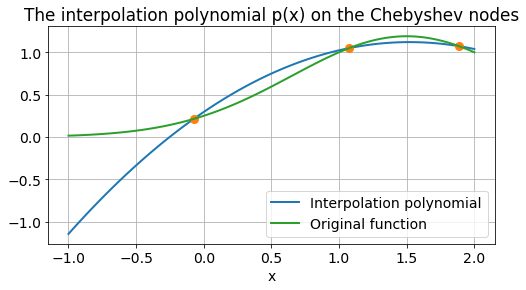

In [5]:
yData, pCheb = getInterpolationPoly(cheb, f)
x = np.linspace(a, b, 101)         # The 'x-axis'
print(pCheb.convert())
plt.title('The interpolation polynomial p(x) on the Chebyshev nodes')
plt.xlabel('x');
plt.plot(x, pCheb(x), label = "Interpolation polynomial")                  # Plot the polynomial
plt.plot(cheb, yData, 'o')                                            # Plot the interpolation points 
plt.plot(x, 2**(-x**2+3*x-2), label = 'Original function')             # Plot the original function
plt.legend()
computeError(a, b, pCheb, f)

We can see that the error for this **small** n is very big.

### d) Plot the error as a function in 𝑥, for both the interpolation in a) and the interpolation in c), on the interval [−1, 2]. Plot both errors in the same plot.

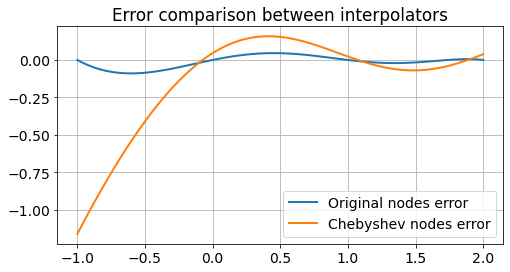

In [6]:
# We have our polynomials p and pCheb, and we can use the array x as our x-axis
plt.title('Error comparison between interpolators')
plt.plot(x, p(x)-f(x), label = 'Original nodes error')
plt.plot(x, pCheb(x)-f(x), label = 'Chebyshev nodes error')
plt.legend()

# However, for n = 100

# Exercise 3
We consider the function $f(x) = sqrt(x)$ on $I=[0, 1]$
### a) Implement the composite trapezoidal rule for the numerical computation of this integral

Let's first implement the simple trapezoidal rule in an interval $[a, b] \in [0, 1]$ we follow the formula:
$$
\int_a^b f(x)dx \approx (b-a)\frac{f(a)+f(b)}{2}
$$

In [7]:
def simple_trapez(f, a, b):  
    # Compute the trapezoidal rule in interval [a, b]
    return (b-a)*(f(a)+f(b))/2

f = lambda x: np.sqrt(x)

And now we can create a simple composite trapezoidal rule dividing the interval in equal parts:

In [8]:
def comp_trapez(f, a, b, n):   
    # Compute the composite trapezoidal rule in interval [a, b], slicing it into n equal length parts
    I = 0
    left = a
    for i in range(0, n):

        right = left + (b-a)/n
        I += simple_trapez(f, left, right)
        left = right
    return I
comp_trapez(f, 0, 1, 10)

0.6605093417068173

We know that the exact solution to this integral is $\frac{2}{3}$, and for $n = 10$ we already get a good result $I \approx 0.6605$.

### b) Estimate the numerical converge rate for this method. 
We will run the method for different values of $n = 2^i, i\in\{0, 1, 2, ...\}$ and analyze the ratio of improvement on the errors from the exact integral

In [9]:
a, b = 0, 1
err_prev = abs(simple_trapez(f, a, b) - 2/3) # Error for simple method
print('Error with 1 subdivision: {:.4f}'.format(err_prev))
err = 0
n = 2
# We will compute the estimated integral in 2, 4, 8, ... up to 1024 subdivisions
for i in range(0, 10):
    err = abs(comp_trapez(f, a, b, n)-2/3) # Compute for n subdivisions
    print('Error with {} subdivisions: {:.4f}'.format(n, err))
    print('Improvement ratio: {:.4f}'.format(err / err_prev)) # Print ratio of improvement
    
    err_prev = err
    n *= 2 # Duplicate the number of subdivisions

Error with 1 subdivision: 0.1667
Error with 2 subdivisions: 0.0631
Improvement ratio: 0.3787
Error with 4 subdivisions: 0.0234
Improvement ratio: 0.3705
Error with 8 subdivisions: 0.0085
Improvement ratio: 0.3651
Error with 16 subdivisions: 0.0031
Improvement ratio: 0.3614
Error with 32 subdivisions: 0.0011
Improvement ratio: 0.3590
Error with 64 subdivisions: 0.0004
Improvement ratio: 0.3574
Error with 128 subdivisions: 0.0001
Improvement ratio: 0.3562
Error with 256 subdivisions: 0.0001
Improvement ratio: 0.3554
Error with 512 subdivisions: 0.0000
Improvement ratio: 0.3549
Error with 1024 subdivisions: 0.0000
Improvement ratio: 0.3545


We observe that the ratio of improvement when doubling the number of subdivions is approximately 0.35, plugging this into the error approximation we get:

$$
\frac{Ch^p}{C(2h)^p} = (1/2)^p \approx 0.35 \implies 2^p \approx \frac{1}{0.35} \implies p \approx \log_2{\frac{1}{0.35}} \approx 1.54
$$

### c) Explain why your result does not contradict the usual theory of the trapezoidal rule.
For the composite trapezoidal rule to work correctly, we need $f \in C[a, b]$, since $f'(x) = \frac{1}{2\sqrt x}$ is not derivable in $x=0$, then the theorem that gives us a quadratical order of convergence, that, is, $p>=2$ doesn't apply on this example.
